---
title: "Convergence of Sequences"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

# Tutorial: Convergence


### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what remains:

$$i_t = y_t - c_t$$ 

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount factor.

For now, we ignore the objective and assume that the saving rate $s=\frac{c_t}{y_t}$ is constant over time.

__Create a `NamedTuple` to hold parameter values $\beta=0.96$, $\delta=0.1$, $\alpha=0.3$, $\gamma=4$.__ 

In [ ]:
α = 0.3
β = 0.96
γ = 4.0
δ = 0.1
s = 0.2


0.91

In [1]:
struct SolowModel
    α::Float64
    β::Float64
    γ::Float64
    δ::Float64
end

In [ ]:
sm = SolowModel(
0.3::Float64,
0.96::Float64,
4.0::Float64,
0.1::Float64,
)

UndefVarError: UndefVarError: `T` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
# dictionary (symbol=>float)
d = Dict(
    :α => 0.3,
    :β => 0.96,
    :γ => 4.0,
    :δ => 0.1
)

Dict{Symbol, Float64} with 4 entries:
  :α => 0.3
  :γ => 4.0
  :δ => 0.1
  :β => 0.96

In [6]:
d[:α]

0.3

In [29]:
# namedtuple

model = (; α=0.3, β=0.96, γ=4.0, δ=0.1, s=0.2)

(α = 0.3, β = 0.96, γ = 4.0, δ = 0.1, s = 0.2)

In [13]:
#unpack values with keywords
α = model.α
β = model.β

(;α,β) = model


(α = 0.3, β = 0.96, γ = 4.0, δ = 0.1)

__Write down the formula of function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.__

__Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent $f$ for a given calibration__

In [32]:
# add saving rate
function f(k,p)
    
    (;α, β, γ, δ, s) = p

    # production

    y = k^α
    i = s*y

    K = (1-δ)*k  + i

    return K
end

f (generic function with 2 methods)

In [34]:
@time f(2.0, model)

  0.000011 seconds (1 allocation: 16 bytes)


2.0462288826689834

__Write a function `simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to compute the simulation over `T` periods starting from initial capital level `k0`.__

In [35]:
function simulate(k0, T, p)

    res = [k0]
    for t=1:T
        k = res[end]
        K = f(k, p)
        push!(res, K)
    end
    return res
end

simulate (generic function with 1 method)

In [39]:
T = 50
res = simulate(2.0, T, model)

51-element Vector{Float64}:
 2.0
 2.0462288826689834
 2.089528674917447
 2.1300608401704926
 2.167981873889157
 2.2034426980783923
 2.236588248806851
 2.2675572178060395
 2.2964819166036654
 2.323488237574935
 ⋮
 2.6574948869350297
 2.659891647730072
 2.662121260861985
 2.6641953419773485
 2.6661247051029044
 2.667919417201969
 2.6695888491235507
 2.6711417231678323
 2.6725861574799716

__Make a nice plot to illustrate the convergence. Do we get convergence from any initial level of capital?__

In [38]:
using Plots   # all exported functions become available including `plot``

In [ ]:
import Plots
Plots.dosomething

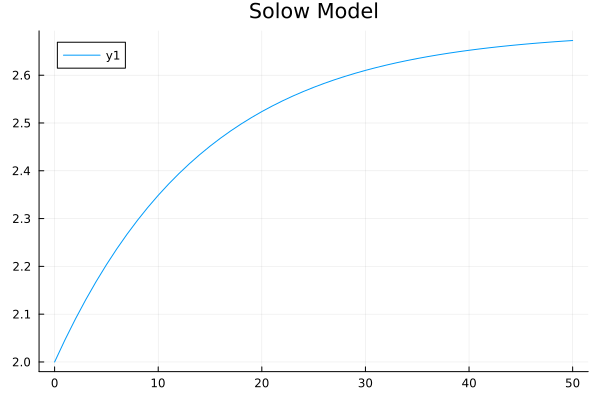

In [42]:
tvec = 0:T
plot(tvec, res; title="Solow Model")

In [44]:
# make the plot with different capital levels
T = 80
res_1 = simulate(1.0, T, model)
res_2 = simulate(2.0, T, model)
res_3 = simulate(3.0, T, model);

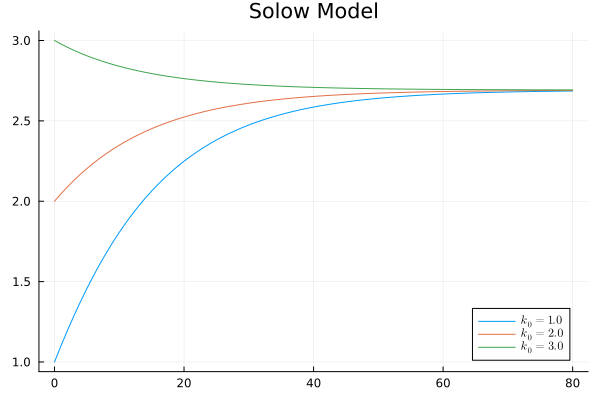

In [49]:
tvec = 0:T
pl = plot(tvec, res_1; title="Solow Model", label="\$k_0=1.0\$");
plot!(pl, tvec, res_2; label="\$k_0=2.0\$");
plot!(pl, tvec, res_3; label="\$k_0=3.0\$");
pl

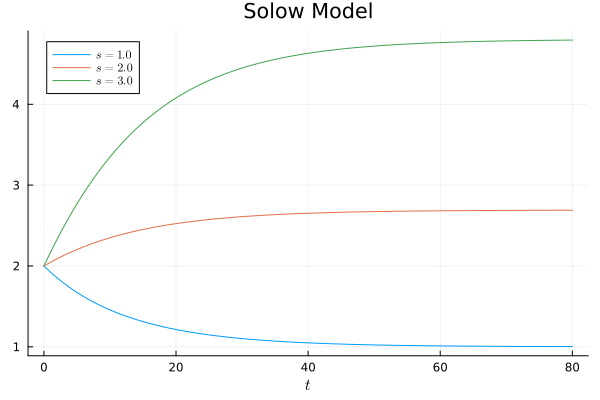

In [55]:
# what about other value of svaing rates ?
res_1 = simulate(2.0, T, merge(model, (;s=0.1)))
res_2 = simulate(2.0, T, merge(model, (;s=0.2)))
res_3 = simulate(2.0, T, merge(model, (;s=0.3)));
pl = plot(tvec, res_1; title="Solow Model", label="\$s=1.0\$", xlabel="\$t\$");
plot!(pl, tvec, res_2; label="\$s=2.0\$");
plot!(pl, tvec, res_3; label="\$s=3.0\$");
pl


__Suppose you were interested in using `f` to compute the steady-state. What would you propose to measure convergence speed? To speed-up convergence? Implement these ideas.__